In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question:
    Which regions prefer which genres?


## 1- Expectations:   
    - It's expected that each region prefers certain genre as all different cultures (UA, NA, JP) 
      don't seem to prefer only one genre .

## 2- Data Collection: 
    

## Read data 

In [2]:
df = read_data(kind='dataset')

## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will drop nan values for better analysis of data

In [3]:
df= handle_missing_values(df, handling_method='knn', neighbors=5,cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 9894


## Handle outliers
    - Number of outliers in ['NA_Sales','EU_Sales','JP_Sales'] is very huge, so it's not the best action to remove all of them.
    - Instead we can remove the rows having more than 1 outlier in these 3 columns.

In [4]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales'])
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4445
Number of original rows:  12274


- This is safer than removing 6182 rows (As shown in Data Exploration section)

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,NA_Sales,EU_Sales,JP_Sales,Other_Sales
699,FIFA Soccer 09,PS2,2008.0,Sports,Electronic Arts,2.28,82.0,8.0,6.9,20.0,EA Canada,E,0.38,0.07,0.01,1.82
924,High School Musical: Sing It!,PS2,2007.0,Misc,Disney Interactive Studios,1.87,NaN,NaN,NaN,NaN,NaN,NaN,0.47,0.08,0.00,1.33
1051,FIFA Soccer 10,PS2,2009.0,Sports,Electronic Arts,1.70,NaN,NaN,8.4,9.0,EA Sports,E,0.23,0.24,0.00,1.23
1249,The Simpsons Game,PS2,2007.0,Action,Electronic Arts,1.51,68.0,10.0,8.2,27.0,Electronic Arts,T,0.35,0.03,0.00,1.13
1378,Need For Speed: Undercover,PS2,2008.0,Racing,Electronic Arts,1.40,NaN,NaN,6.5,38.0,Exient Entertainment,T,0.38,0.08,0.03,0.93


## Analysis

In [6]:
df['Genre'].value_counts()

Action          2554
Sports          1650
Misc            1373
Adventure       1139
Racing           954
Shooter          942
Role-Playing     879
Simulation       660
Platform         605
Fighting         552
Strategy         512
Puzzle           453
Name: Genre, dtype: int64

### Sales Distribution

In [7]:
df['NA_Sales'].describe()

count    12274.000000
mean         0.102037
std          0.121859
min          0.000000
25%          0.000000
50%          0.060000
75%          0.150000
max          0.600000
Name: NA_Sales, dtype: float64

In [8]:
df['EU_Sales'].describe()

count    12274.000000
mean         0.041986
std          0.060128
min          0.000000
25%          0.000000
50%          0.020000
75%          0.060000
max          0.270000
Name: EU_Sales, dtype: float64

In [9]:
df['JP_Sales'].describe()

count    12274.000000
mean         0.010366
std          0.022209
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max          0.100000
Name: JP_Sales, dtype: float64

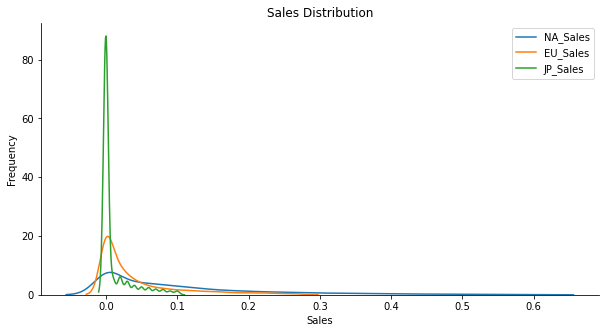

In [10]:
# plot the distribution of the sales 
plt.figure(figsize=(10,5))
# plt.style.use('dark_background')
plt.title('Sales Distribution')

Sales= ['NA_Sales','EU_Sales','JP_Sales']
# colors=['yellow','pink','aqua']
for i in range(len(Sales)):
    sns.kdeplot(df[Sales[i]], label=Sales[i])

sns.despine(left=False, bottom=False)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Sales by genre in each Region

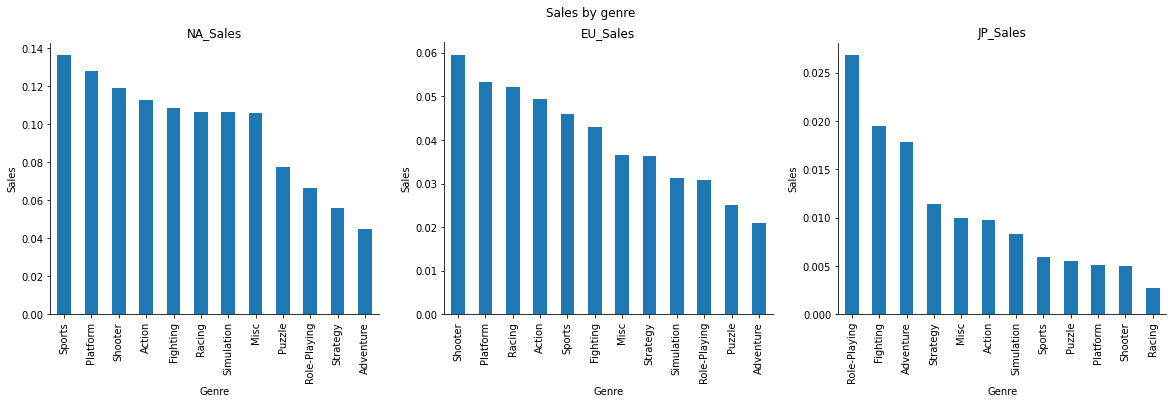

In [11]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
# plt.style.use('dark_background')
plt.suptitle('Sales by genre')
sns.despine(left=False, bottom=False)

Sales= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(len(Sales)):
    df.groupby(['Genre'])[Sales[i]].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(Sales[i])
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Sales')
plt.show()


### Let's see the impact of ESRP rating on the sales

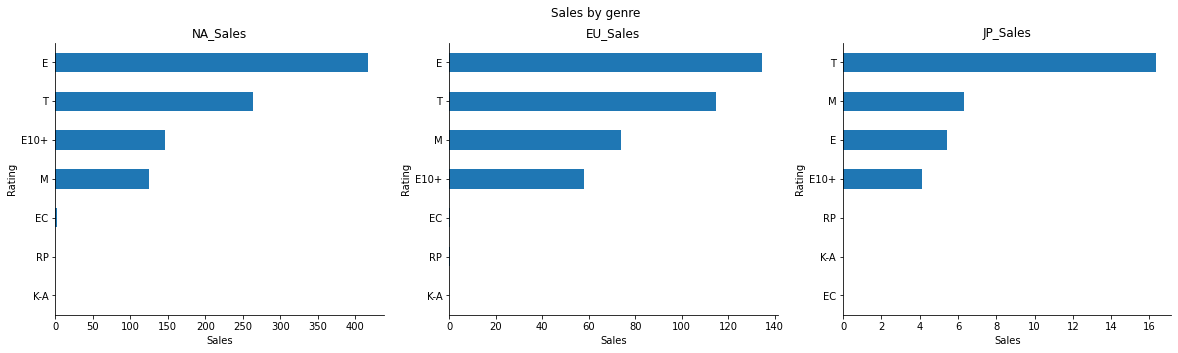

In [12]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

plt.suptitle('Sales by genre')
sns.despine(left=False, bottom=False)

Sales= ['NA_Sales','EU_Sales','JP_Sales']
for i in range(len(Sales)):
    df.groupby(['Rating'])[Sales[i]].sum().sort_values(ascending=True).plot(kind='barh', ax=axes[i])
    axes[i].set_title(Sales[i])
    axes[i].set_xlabel('Sales')
    axes[i].set_ylabel('Rating')
plt.show()

#### Let's explore the most common genres with ratings E,T,M

In [13]:
# keep only rows with ratings E,T,M
df = df[df['Rating'].isin(['E','T','M'])] 
df['Rating'].value_counts()

E    3133
T    2242
M    1045
Name: Rating, dtype: int64

"\nIt's clear that the most popular genre with rating E is Sports then Racing.\nAnd the most popular genre with rating T is Action then Role-Playing and shooter.\nAnd the most popular genre with rating M is Action then Shooter.\n"

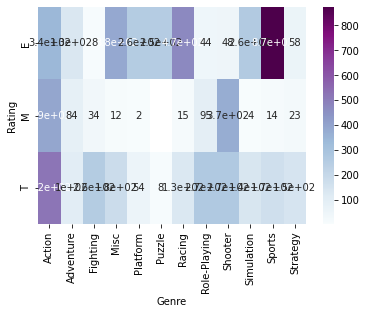

In [14]:
rating_genre=df.groupby(['Rating'])['Genre'].value_counts().unstack().sort_values(by='Genre', axis=1)
sns.heatmap(rating_genre,cmap='BuPu',annot=True)
plt.rcParams['figure.figsize'] = [20, 10]

'''
It's clear that the most popular genre with rating E is Sports then Racing.
And the most popular genre with rating T is Action then Role-Playing and shooter.
And the most popular genre with rating M is Action then Shooter.
'''

## Hypothesis 
   - H0: All Regions prefer the same genre (genre with highest global sales).
   - HA: Each Region prefer different genre 

### T-Test
##### Use T-test to test the relationship between a numerical variable (NA/EU/JP Sales) and a categorical variable (Genre) we want to test if sports is the preferred genre in all regions.
     

In [15]:
from scipy.stats import ttest_ind

def ttest(df, col, lbl):
    # get unique labels
    labels = df[lbl].unique()

    data = [df[df[lbl] == label][col].mean() for label in labels]

    t = 0
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            tij, pij = ttest_ind(df[df[lbl] == labels[i]][col].values,
                                 df[df[lbl] == labels[j]][col].values)
            if abs(tij) > t:
                t, p, label1, label2 = tij, pij, labels[i], labels[j]

    return t, p, label1, label2

lbls=['NA_Sales','EU_Sales','JP_Sales']
cols=['Genre']
for i in range(3):
    t, p, label1, label2 = ttest(df, lbls[i], cols[0])
    print(f'For {cols[0]} Vs. {lbls[i]}:')
    print(f'best value when comparing {label1} Vs. {label2}')
    print(f'p-value = {p:.6f}')
    if p < 0.05 and label1 != 'Sports':
        print('Reject H0: the highest mean is not for the Sports genre')
    else:
        print('Retain H0: the highest mean is for the Sports genre')
    print('-'*50)

For Genre Vs. NA_Sales:
best value when comparing Sports Vs. Strategy
p-value = 0.000000
Retain H0: the highest mean is for the Sports genre
--------------------------------------------------
For Genre Vs. EU_Sales:
best value when comparing Shooter Vs. Puzzle
p-value = 0.000000
Reject H0: the highest mean is not for the Sports genre
--------------------------------------------------
For Genre Vs. JP_Sales:
best value when comparing Role-Playing Vs. Shooter
p-value = 0.000000
Reject H0: the highest mean is not for the Sports genre
--------------------------------------------------


### Anova Test

In [16]:
from scipy.stats import f_oneway

def anova(df, col, lbl):
    # get unique labels
    labels = df[lbl].unique()
    # get data
    data = [df[df[lbl] == label][col] for label in labels]
    # anova
    f, p = f_oneway(*data)
    # get labels with largest difference in means
    means = [x.mean() for x in data]
    label1, label2 = labels[means.index(max(means))], labels[means.index(min(means))]
    # return f-statistic, p-value, and labels
    return f, p, label1, label2

lbls=['NA_Sales','EU_Sales','JP_Sales']
cols=['Genre']
for i in range(3):
    f, p, label1, label2 = anova(df, lbls[i], cols[0])

    print(f'For {cols[0]} Vs. {lbls[i]}:')
    print(f'best value when comparing {label1} Vs. {label2}')
    print(f'p-value = {p:.6f}')
    print(f'f-statistic = {f:.6f}')
    if p < 0.05 and label1 != 'Sports':
        print('Reject H0: the highest mean is not for the Sports genre')
    else:
        print('Retain H0: the highest mean is for the Sports genre')

    print('-'*50)
    

For Genre Vs. NA_Sales:
best value when comparing Sports Vs. Strategy
p-value = 0.000000
f-statistic = 21.148081
Retain H0: the highest mean is for the Sports genre
--------------------------------------------------
For Genre Vs. EU_Sales:
best value when comparing Shooter Vs. Puzzle
p-value = 0.000000
f-statistic = 14.171241
Reject H0: the highest mean is not for the Sports genre
--------------------------------------------------
For Genre Vs. JP_Sales:
best value when comparing Role-Playing Vs. Sports
p-value = 0.000000
f-statistic = 46.887119
Reject H0: the highest mean is not for the Sports genre
--------------------------------------------------


## 3- Comparing Expectations to data:
    - It seems that not because a genre is the most frequent, it's the most favored.
    - Sports is the most frequent genre, but it's not the most favored in all regions, only in North America.
    - The most favored genre in Europe is Shooter, and in Japan is Role-Playing.
        